In [16]:
import pandas as pd
import numpy as np

In [17]:
from google.colab import drive
drive.mount('/content/drive')
mpg = pd.read_csv('/content/drive/MyDrive/mpg.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 2개 이상의 문법 사용
- 최소 10개 이상 코드 작성

In [53]:
mpg.head(10)
mpg.tail(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,fuel_mean,displ_mean
224,volkswagen,new beetle,2.0,1999,4,auto(l4),f,19,26,r,subcompact,22.5,3.471795
225,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,24.0,3.471795
226,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact,24.5,3.471795
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize,25.0,3.471795
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize,23.5,3.471795
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,3.471795
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,3.471795
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,3.471795
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,3.471795
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize,21.5,3.471795


#1. 아우디 차의 도시연비 평균은?

In [19]:
audi_mean = mpg.query("manufacturer == 'audi'").mean()['cty']
audi_mean

<ipython-input-19-b1c9e1152ebd>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  audi_mean = mpg.query("manufacturer == 'audi'").mean()['cty']


17.61111111111111

#2. 제조사별 평균 연비는?

<AxesSubplot:xlabel='manufacturer'>

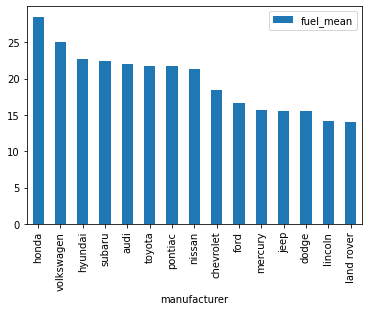

In [33]:
# cty와 hwy 평균을 구한 total이라는 파생변수 만들기
mpg = mpg.assign(fuel_mean = (mpg['cty']+mpg['hwy'])/2)

# 제조사별 평균 연비 비교 , 가장 평균 연비가 높은 순대로 정렬
mpg_fuel_mean = mpg.groupby(mpg['manufacturer']).mean().sort_values(by = ['fuel_mean'], ascending = False)[['fuel_mean']]
mpg_fuel_mean.plot.bar()

honda의 평균 연비가 가장 높으며, land rover의 평균 연비가 가장 적다.

# 3. 제조사별 도시연비 평균이 가장 높은 제조사 중 자신의 평균 도시연비의 값이 작거나 같았던 경우는 총 몇번인가

In [45]:
# 제조사별 도시연비 평균 (내림차순 정렬)
mpg_cty_mean = mpg.groupby(mpg['manufacturer']).mean()[['cty']].sort_values(by = ['cty'], ascending = False)
mpg_cty_mean

,cty
manufacturer,
honda,24.444444
volkswagen,20.925926
subaru,19.285714
hyundai,18.642857
toyota,18.529412
nissan,18.076923
audi,17.611111
pontiac,17.000000
chevrolet,15.000000


In [46]:
honda = mpg.query("manufacturer == 'honda'")[['manufacturer','cty']]
honda['mean'] = honda['cty'].mean()
honda.query("cty <= mean").count()

manufacturer    5
cty             5
mean            5
dtype: int64

가장 높은 도시연비 평균을 가진 제조사는 honda이며 자신의 평균 도시연비값보다 작거나 같았는 경우는 총 5번이다.

#4. displ 전체 평균을 구하고 전체 평균보다 낮은 값을 가장 많이 가진 제조사는 어디인가?

In [50]:
# displ_mean : displ 전체 평균 파생변수
mpg['displ_mean'] = mpg['displ'].mean()
# displ_mean보다 작거나 같은 displ 값을 가진 manufacturer, displ, displ_mean 칼럼만 가지고 있는 새로운 데이터프레임으로 정의
mpg_displ = mpg.query('displ <= displ_mean')[['manufacturer','displ','displ_mean']]
mpg_displ

,manufacturer,displ,displ_mean
0,audi,1.8,3.471795
1,audi,1.8,3.471795
2,audi,2.0,3.471795
3,audi,2.0,3.471795
4,audi,2.8,3.471795
...,...,...,...
228,volkswagen,1.8,3.471795
229,volkswagen,2.0,3.471795
230,volkswagen,2.0,3.471795
231,volkswagen,2.8,3.471795


In [52]:
# 제조사별 개수 세기 (내림차순 정렬)
mpg_displ.groupby('manufacturer').count().sort_values(by=['displ'], ascending = False)

,displ,displ_mean
manufacturer,,
toyota,27,27
volkswagen,26,26
audi,17,17
hyundai,14,14
subaru,14,14
honda,9,9
nissan,8,8
dodge,7,7
chevrolet,3,3


전체 displ 평균 값 보다 같거나 작은  displ값을 가진 차량의 수가 가장 많은 제조사는 toyota이며 가장 적은 수를 가진 제조사는 pontiac이다.

#5. volkswagen 제조사의 model별 hwy 비교

In [60]:
# volkswagen 제조사 데이터만 추출
volkswagen = mpg.query('manufacturer == "volkswagen"')
volkswagen
volkswagen.groupby('model').mean()[['hwy']].sort_values(by=['hwy'],ascending=False)

,hwy
model,
new beetle,32.833333
jetta,29.111111
passat,27.571429
gti,27.400000


model new beetle의 hwy 평균값이 가장 높다.

#6. trans 종류 중 평균 displ 값이 가장 높은 것은?

In [68]:
mpg.groupby('trans').agg(displ_mean = ('displ','mean')).sort_values('displ_mean',ascending=False)

,displ_mean
trans,
auto(l6),4.633333
auto(l5),3.917949
auto(s5),3.766667
auto(l4),3.715663
manual(m6),3.678947
auto(s4),3.433333
auto(s6),3.412500
auto(av),2.920000
manual(m5),2.732759


auto(I6)의 displ 평균 값이 가장 높다.

#7. hyundai차의 model별 연비 비교 

In [70]:
hyundai = mpg.query('manufacturer=="hyundai"')
hyundai.groupby('model').agg(mean_cty = ('cty','mean'),
                             mean_hwy = ('hwy','mean'),
                             mean_displ = ('displ','mean'))[['mean_cty','mean_hwy','mean_displ']]

,mean_cty,mean_hwy,mean_displ
model,,,
sonata,19.000000,27.714286,2.557143
tiburon,18.285714,26.000000,2.300000


#8. manufacturer 별 fuel_mean의 최소값과 최댓값

In [78]:
mpg.groupby('manufacturer').agg([min,max])[['fuel_mean']]

fuel_mean      
                   min   max
manufacturer                
audi              19.5  25.5
chevrolet         12.5  26.0
dodge             10.5  21.0
ford              13.0  22.0
honda             25.0  30.5
hyundai           20.0  26.0
jeep              10.5  19.5
land rover        13.0  15.0
lincoln           13.5  15.0
mercury           15.0  16.0
nissan            15.0  27.5
pontiac           20.5  23.0
subaru            20.5  23.5
toyota            13.0  32.5
volkswagen        19.5  39.5

#9. manufacturer과 fl 별 cty, hwy , displ 평균

In [83]:
mpg.groupby(['manufacturer','fl']).mean()[['cty','hwy','displ']]

cty        hwy     displ
manufacturer fl                                
audi         p   17.611111  26.444444  2.544444
chevrolet    d   14.000000  17.000000  6.500000
             e   11.000000  14.500000  5.300000
             p   15.400000  24.800000  6.160000
             r   15.636364  22.363636  4.390909
dodge        e    9.400000  13.000000  4.420000
             r   13.718750  18.718750  4.371875
ford         p   14.000000  20.000000  5.400000
             r   14.000000  19.333333  4.500000
honda        c   24.000000  36.000000  1.800000
             p   22.000000  29.000000  1.800000
             r   25.333333  33.166667  1.666667
hyundai      r   18.642857  26.857143  2.428571
jeep         d   17.000000  22.000000  3.000000
             e    9.000000  12.000000  4.700000
             p   11.000000  14.000000  6.100000
             r   14.200000  18.600000  4.560000
land rover   p   11.000000  15.000000  4.300000
             r   12.000000  18.000000  4.300000
lincoln      p   11.000000  16.000000  5.400000
             r   11.500000  17.500000  5.400000
mercury      r   13.250000  18.000000  4.400000
nissan       p   16.600000  23.200000  4.020000
             r   19.000000  25.500000  2.800000
pontiac      p   16.000000  25.500000  4.550000
             r   17.666667  27.000000  3.566667
subaru       p   19.000000  24.500000  2.500000
             r   19.400000  26.000000  2.440000
toyota       r   18.529412  24.911765  2.952941
volkswagen   d   32.333333  43.000000  1.900000
             p   19.636364  28.090909  2.254545
             r   19.384615  27.000000  2.338462

#10. 제조사 별 category 개수

In [86]:
mpg.groupby(['manufacturer','category']).count()

model  displ  year  cyl  trans  drv  cty  hwy  fl  \
manufacturer category                                                        
audi         compact        15     15    15   15     15   15   15   15  15   
             midsize         3      3     3    3      3    3    3    3   3   
chevrolet    2seater         5      5     5    5      5    5    5    5   5   
             midsize         5      5     5    5      5    5    5    5   5   
             suv             9      9     9    9      9    9    9    9   9   
dodge        minivan        11     11    11   11     11   11   11   11  11   
             pickup         19     19    19   19     19   19   19   19  19   
             suv             7      7     7    7      7    7    7    7   7   
ford         pickup          7      7     7    7      7    7    7    7   7   
             subcompact      9      9     9    9      9    9    9    9   9   
             suv             9      9     9    9      9    9    9    9   9   
honda        subcompact      9      9     9    9      9    9    9    9   9   
hyundai      midsize         7      7     7    7      7    7    7    7   7   
             subcompact      7      7     7    7      7    7    7    7   7   
jeep         suv             8      8     8    8      8    8    8    8   8   
land rover   suv             4      4     4    4      4    4    4    4   4   
lincoln      suv             3      3     3    3      3    3    3    3   3   
mercury      suv             4      4     4    4      4    4    4    4   4   
nissan       compact         2      2     2    2      2    2    2    2   2   
             midsize         7      7     7    7      7    7    7    7   7   
             suv             4      4     4    4      4    4    4    4   4   
pontiac      midsize         5      5     5    5      5    5    5    5   5   
subaru       compact         4      4     4    4      4    4    4    4   4   
             subcompact      4      4     4    4      4    4    4    4   4   
             suv             6      6     6    6      6    6    6    6   6   
toyota       compact        12     12    12   12     12   12   12   12  12   
             midsize         7      7     7    7      7    7    7    7   7   
             pickup          7      7     7    7      7    7    7    7   7   
             suv             8      8     8    8      8    8    8    8   8   
volkswagen   compact        14     14    14   14     14   14   14   14  14   
             midsize         7      7     7    7      7    7    7    7   7   
             subcompact      6      6     6    6      6    6    6    6   6   

                         fuel_mean  displ_mean  
manufacturer category                           
audi         compact            15          15  
             midsize             3           3  
chevrolet    2seater             5           5  
             midsize             5           5  
             suv                 9           9  
dodge        minivan            11          11  
             pickup             19          19  
             suv                 7           7  
ford         pickup              7           7  
             subcompact          9           9  
             suv                 9           9  
honda        subcompact          9           9  
hyundai      midsize             7           7  
             subcompact          7           7  
jeep         suv                 8           8  
land rover   suv                 4           4  
lincoln      suv                 3           3  
mercury      suv                 4           4  
nissan       compact             2           2  
             midsize             7           7  
             suv                 4           4  
pontiac      midsize             5           5  
subaru       compact             4           4  
             subcompact          4           4  
             suv                 6           6  
toyota       compact            12          12  


#11. 제조사의 trans별 fuel_mean 최댓값, 최솟값 비교

In [87]:
mpg.groupby(['manufacturer','trans']).agg(['max','median','min'])[['fuel_mean']]

<ipython-input-87-bf7e17d388dd>:1: FutureWarning: ['model', 'drv', 'fl', 'category'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  mpg.groupby(['manufacturer','trans']).agg(['max','median','min'])[['fuel_mean']]


fuel_mean             
                              max median   min
manufacturer trans                            
audi         auto(av)        25.5  24.00  22.5
             auto(l5)        23.5  20.50  19.5
             auto(s6)        23.0  21.00  19.5
             manual(m5)      25.0  22.00  21.0
             manual(m6)      25.5  24.00  20.0
chevrolet    auto(l4)        26.0  16.75  12.5
             auto(s6)        21.5  20.75  20.0
             manual(m6)      21.0  21.00  19.5
dodge        auto(l3)        21.0  21.00  21.0
             auto(l4)        20.5  15.50  13.0
             auto(l5)        16.5  15.00  10.5
             auto(l6)        19.5  19.50  19.5
             manual(m5)      15.5  14.00  13.5
             manual(m6)      17.0  14.00  10.5
ford         auto(l4)        21.5  15.00  13.0
             auto(l5)        20.0  16.00  15.5
             auto(l6)        16.0  15.50  15.0
             manual(m5)      22.0  18.50  14.5
             manual(m6)      17.0  17.00  17.0
honda        auto(l4)        28.0  28.00  28.0
             auto(l5)        30.5  30.25  30.0
             manual(m5)      30.5  29.25  26.0
             manual(m6)      25.0  25.00  25.0
hyundai      auto(l4)        25.5  22.25  20.5
             auto(l5)        23.5  23.50  23.5
             manual(m5)      26.0  23.25  20.5
             manual(m6)      20.0  20.00  20.0
jeep         auto(l4)        17.5  16.50  15.5
             auto(l5)        19.5  16.00  10.5
land rover   auto(l4)        13.0  13.00  13.0
             auto(s6)        15.0  15.00  15.0
lincoln      auto(l4)        14.0  13.75  13.5
             auto(l6)        15.0  15.00  15.0
mercury      auto(l4)        15.0  15.00  15.0
             auto(l5)        16.0  15.75  15.5
             auto(l6)        16.0  16.00  16.0
nissan       auto(av)        27.0  22.50  22.0
             auto(l4)        23.0  22.00  15.5
             auto(l5)        17.0  17.00  17.0
             auto(s5)        15.0  15.00  15.0
             manual(m5)      25.0  22.00  16.0
             manual(m6)      27.5  25.25  23.0
pontiac      auto(l4)        23.0  22.00  21.0
             auto(s4)        20.5  20.50  20.5
subaru       auto(l4)        23.5  22.50  20.5
             auto(s4)        23.5  23.00  22.5
             manual(m5)      23.5  22.50  21.5
toyota       auto(l3)        27.0  27.00  27.0
             auto(l4)        30.5  22.00  13.0
             auto(l5)        26.0  18.00  15.5
             auto(s5)        26.5  24.50  22.5
             auto(s6)        23.5  19.50  15.5
             manual(m5)      32.5  22.00  16.0
             manual(m6)      16.5  16.50  16.5
volkswagen   auto(l4)        35.0  22.50  19.5
             auto(l5)        23.5  22.25  21.0
             auto(s6)        25.5  24.75  21.5
             manual(m5)      39.5  25.00  20.5
             manual(m6)      25.0  25.00  25.0